In [ ]:
%run RunOpenLapSim.py

[{'gripx': 1.0, 'clt': 0.5, 'cx': 0.3}, {'gripx': 1.0, 'clt': 0.5, 'cx': 0.35}, {'gripx': 1.0, 'clt': 1.0, 'cx': 0.3}, {'gripx': 1.0, 'clt': 1.0, 'cx': 0.35}, {'gripx': 1.1, 'clt': 0.5, 'cx': 0.3}, {'gripx': 1.1, 'clt': 0.5, 'cx': 0.35}, {'gripx': 1.1, 'clt': 1.0, 'cx': 0.3}, {'gripx': 1.1, 'clt': 1.0, 'cx': 0.35}, {'gripx': 1.2, 'clt': 0.5, 'cx': 0.3}, {'gripx': 1.2, 'clt': 0.5, 'cx': 0.35}, {'gripx': 1.2, 'clt': 1.0, 'cx': 0.3}, {'gripx': 1.2, 'clt': 1.0, 'cx': 0.35}]
---------------------------
OpenLapSim
---------------------------
param {'gripx': 1.0, 'clt': 0.5, 'cx': 0.3}
key gripx -> val 1.0
key clt -> val 0.5
key cx -> val 0.3
param {'gripx': 1.0, 'clt': 0.5, 'cx': 0.35}
key gripx -> val 1.0
key clt -> val 0.5
key cx -> val 0.35
param {'gripx': 1.0, 'clt': 1.0, 'cx': 0.3}
key gripx -> val 1.0
key clt -> val 1.0
key cx -> val 0.3
param {'gripx': 1.0, 'clt': 1.0, 'cx': 0.35}
key gripx -> val 1.0
key clt -> val 1.0
key cx -> val 0.35
param {'gripx': 1.1, 'clt': 0.5, 'cx': 0.3}
ke

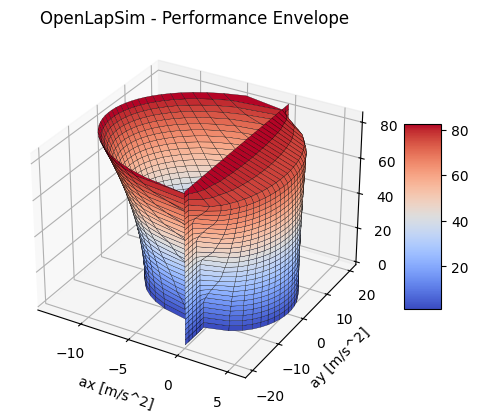

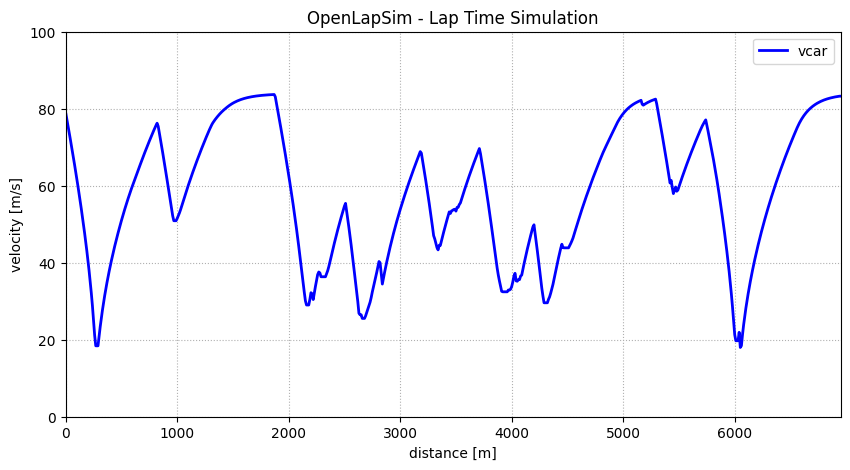

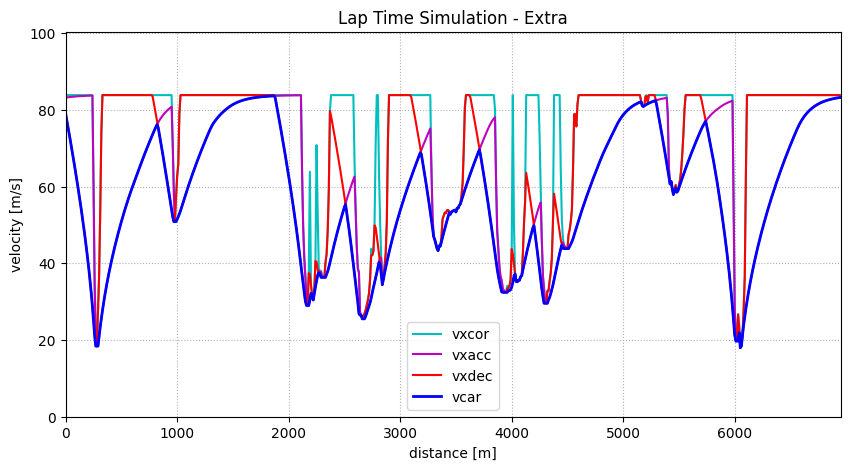

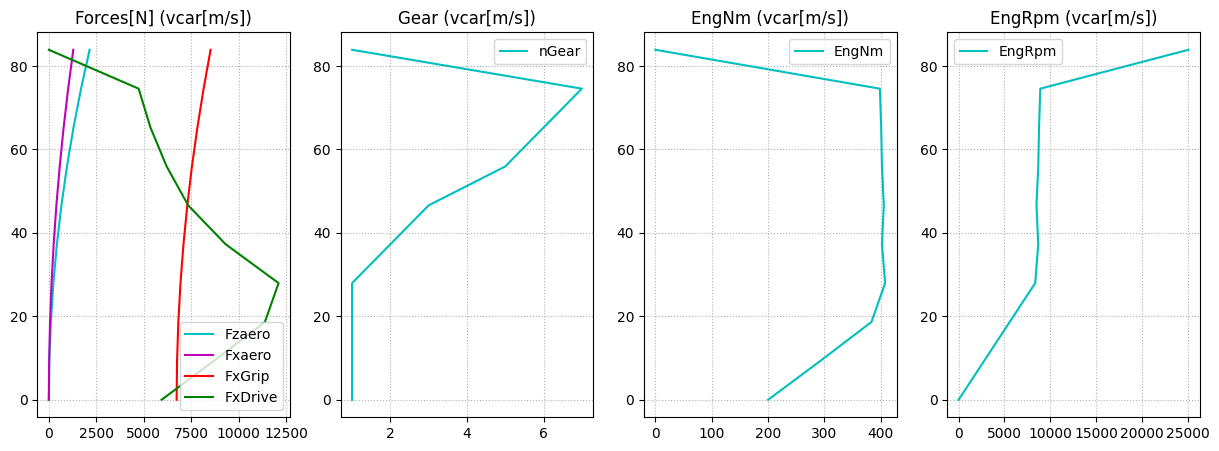

TypeError: unhashable type: 'dict'

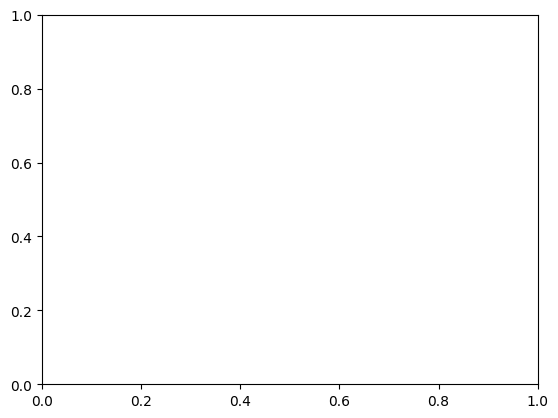

In [1]:
%run RunOpenLapSimBM.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

# load and compute x,y as before     
track = np.loadtxt("trackFiles/trackFile.txt")
dist = track[:, 0]
curv = track[:, 1]

x = np.zeros_like(dist)
y = np.zeros_like(dist)
theta = 0
delta_s = 10

for i in range(1, len(dist)):
    deltaTheta = curv[i] * delta_s
    R = 1/curv[i]
    # incrementally update heading, then position
    theta += deltaTheta             
    x[i] = x[i-1] + R*(np.sin(theta) - np.sin(theta - deltaTheta))
    y[i] = y[i-1] + R*(np.cos(theta - deltaTheta) - np.cos(theta))

# build segments between consecutive points
points = np.stack([x, y], axis=1)
segments = np.stack([points[:-1], points[1:]], axis=1)

# normalize distance for colormap
# take the midpoint distance of each segment
d_mid = 0.5*(dist[:-1] + dist[1:])
norm = (d_mid - d_mid.min()) / (d_mid.max() - d_mid.min())

# create a LineCollection, map normalized distance to a colormap
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0,1))
lc.set_array(norm)
lc.set_linewidth(2)

fig, ax = plt.subplots(figsize=(8,8))
ax.add_collection(lc)
ax.set_aspect('equal', 'datalim')
ax.autoscale()
plt.colorbar(lc, label='Distance along track')
plt.title("Track with Distance-Based Gradient")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

track = np.loadtxt("trackFiles/trackFile.txt")
dist = track[:, 0]
curv = track[:, 1]

x = dist
y = curv

# x_i = 0
# y_i = 0
# theta = 0

# delta_s = 10

# for i in range(len(dist)):
#     r = 1/curv[i]
#     deltaTheta = curv[i] * delta_s
#     theta += deltaTheta
#     if i != 0:
#         x[i] = x[i-1] + r * (np.sin(deltaTheta+theta) - np.sin(theta))
#         y[i] = y[i-1] + r * (np.cos(deltaTheta+theta) - np.cos(theta))
#     else: 
#         x[i] = 0
#         y[i] = 0

plt.plot(x, abs(1/y))

In [ ]:
%run RunOpenLapSimDPG.py